<a href="https://colab.research.google.com/github/pbduy/Machine_Learning/blob/master/CNN_Convolution_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Prepare data
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Normalize data
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

#Convert to one-hot vector
def onehot(y):
  oh = np.zeros((y.shape[0], 10))
  oh[np.arange(y.shape[0]), y] = 1
  return oh

y_train_oh = onehot(y_train)
y_test_oh = onehot(y_test)

11493376/11490434 [==============================] - 0s 0us/step


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Size of input:  (60000, 28, 28)


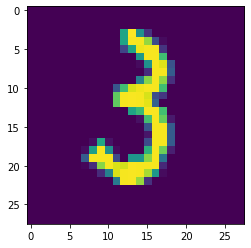

In [2]:
import matplotlib.pyplot as plt

index = 1234
print(y_train_oh[index])
plt.imshow(x_train_norm[index])
print('Size of input: ', x_train_norm.shape)

# Task 1: Implement LeNet for MNIST dataset.

In [3]:
from keras.layers import Input, Conv2D, Dense, MaxPooling2D, Flatten
from keras import Model

class LeNet:
  def __init__(self):
    self.model = None

  def build(self, input_dim):
    input = Input(shape=input_dim)

    #Convolution block
    C1 = Conv2D(6, (3, 3), padding="same", activation='relu', use_bias=True)(input)
    S2 = MaxPooling2D(pool_size=(2, 2), strides=2, padding="same")(C1)
    C3 = Conv2D(16, (5, 5), padding="same", activation='relu', use_bias=True)(S2)
    S4 = MaxPooling2D(pool_size=(2, 2), strides=2, padding="same")(C3)

    #Fully connected block
    flat = Flatten()(S4)
    FC5 = Dense(120, activation='relu', use_bias=True)(flat)
    FC6 = Dense(84, activation='relu', use_bias=True)(FC5)
    output = Dense(10, activation='softmax', use_bias=True)(flat)

    self.model = Model(input, output)
    self.model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

  def train(self, x_train, y_train):
    history = self.model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2)
    return history
  
  def predict(self, x_test):
    return self.model.predict(x_test)
  
  def summary(self):
    self.model.summary()
  
  def load(self, model_file):
    self.model = load_model(model_file)
  
  def save(self, model_file):
    self.model.save(model_file)

In [4]:
leNet = LeNet()
leNet.build((28, 28, 1))
leNet.summary()
hist = leNet.train(x_train_norm, y_train_oh)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

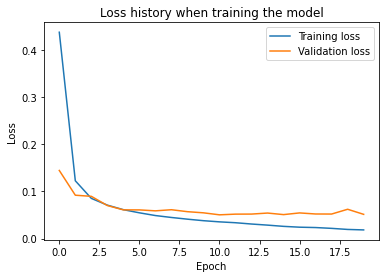

In [5]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss history when training the model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss']) #Table
plt.show()

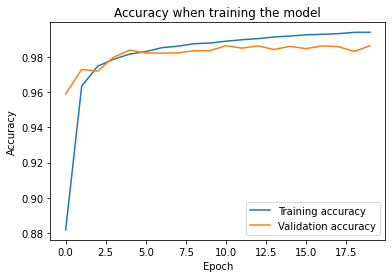

In [6]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy when training the model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy']) #Table
plt.show()

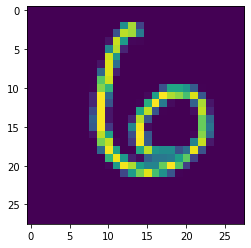

Predicted label of the first test sample:  6
Ground-truth of the 100 -th sample:  6


In [7]:
test_index = 100
plt.imshow(x_test_norm[test_index])
plt.show()
predict_label = leNet.predict(x_test_norm)

print('Predicted label of the first test sample: ', np.argmax(predict_label[test_index]))
print('Ground-truth of the', test_index,'-th sample: ', y_test[test_index])

# Task 2: Replace RELu by sigmoid and tanh respectively

##2.1: Replace RELu by sigmoid

In [8]:
class LeNet_sigmoid:
  def __init__(self):
    self.model = None

  def build(self, input_dim):
    input = Input(shape=input_dim)

    #Convolution block
    C1 = Conv2D(6, (3, 3), padding="same", activation='sigmoid', use_bias=True)(input)
    S2 = MaxPooling2D(pool_size=(2, 2), strides=2, padding="same")(C1)
    C3 = Conv2D(16, (5, 5), padding="same", activation='sigmoid', use_bias=True)(S2)
    S4 = MaxPooling2D(pool_size=(2, 2), strides=2, padding="same")(C3)

    #Fully connected block
    flat = Flatten()(S4)
    FC5 = Dense(120, activation='sigmoid', use_bias=True)(flat)
    FC6 = Dense(84, activation='sigmoid', use_bias=True)(FC5)
    output = Dense(10, activation='softmax', use_bias=True)(flat)

    self.model = Model(input, output)
    self.model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

  def train(self, x_train, y_train):
    history = self.model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2)
    return history
  
  def predict(self, x_test):
    return self.model.predict(x_test)
  
  def summary(self):
    self.model.summary()
  
  def load(self, model_file):
    self.model = load_model(model_file)
  
  def save(self, model_file):
    self.model.save(model_file)

In [9]:
leNet_sigmoid = LeNet_sigmoid()
leNet_sigmoid.build((28, 28, 1))
leNet_sigmoid.summary()
hist_sigmoid = leNet_sigmoid.train(x_train_norm, y_train_oh)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 6)         60        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

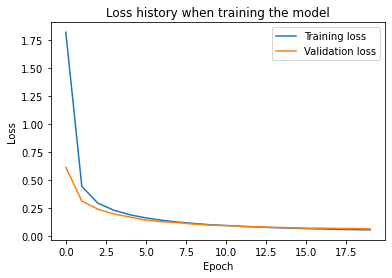

In [10]:
plt.plot(hist_sigmoid.history['loss'])
plt.plot(hist_sigmoid.history['val_loss'])
plt.title('Loss history when training the model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss']) #Table
plt.show()

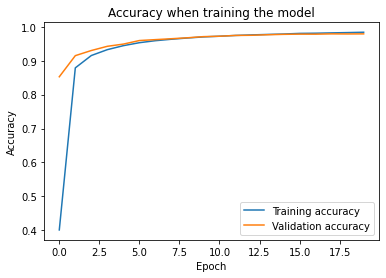

In [11]:
plt.plot(hist_sigmoid.history['accuracy'])
plt.plot(hist_sigmoid.history['val_accuracy'])
plt.title('Accuracy when training the model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy']) #Table
plt.show()

##2.2: Replace RELu by tanh




In [12]:
class LeNet_tanh:
  def __init__(self):
    self.model = None

  def build(self, input_dim):
    input = Input(shape=input_dim)

    #Convolution block
    C1 = Conv2D(6, (3, 3), padding="same", activation='tanh', use_bias=True)(input)
    S2 = MaxPooling2D(pool_size=(2, 2), strides=2, padding="same")(C1)
    C3 = Conv2D(16, (5, 5), padding="same", activation='tanh', use_bias=True)(S2)
    S4 = MaxPooling2D(pool_size=(2, 2), strides=2, padding="same")(C3)

    #Fully connected block
    flat = Flatten()(S4)
    FC5 = Dense(120, activation='tanh', use_bias=True)(flat)
    FC6 = Dense(84, activation='tanh', use_bias=True)(FC5)
    output = Dense(10, activation='softmax', use_bias=True)(flat)

    self.model = Model(input, output)
    self.model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

  def train(self, x_train, y_train):
    history = self.model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2)
    return history
  
  def predict(self, x_test):
    return self.model.predict(x_test)
  
  def summary(self):
    self.model.summary()
  
  def load(self, model_file):
    self.model = load_model(model_file)
  
  def save(self, model_file):
    self.model.save(model_file)

In [13]:
leNet_tanh = LeNet_tanh()
leNet_tanh.build((28, 28, 1))
leNet_tanh.summary()
hist_tanh = leNet_tanh.train(x_train_norm, y_train_oh)

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 6)         60        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

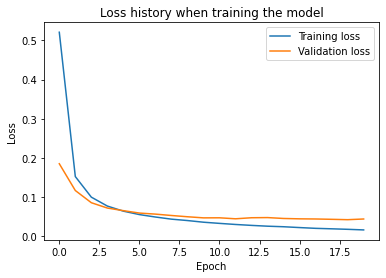

In [14]:
plt.plot(hist_tanh.history['loss'])
plt.plot(hist_tanh.history['val_loss'])
plt.title('Loss history when training the model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss']) #Table
plt.show()

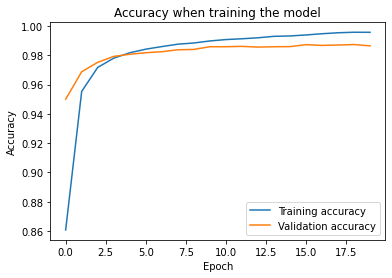

In [15]:
plt.plot(hist_tanh.history['accuracy'])
plt.plot(hist_tanh.history['val_accuracy'])
plt.title('Accuracy when training the model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy']) #Table
plt.show()

# Task 3: Replace Adam optimizer by SGD optimizer

In [16]:
from keras.layers import Input, Conv2D, Dense, MaxPooling2D, Flatten
from keras import Model

class LeNet_sgd:
  def __init__(self):
    self.model = None

  def build(self, input_dim):
    input = Input(shape=input_dim)

    #Convolution block
    C1 = Conv2D(6, (3, 3), padding="same", activation='relu', use_bias=True)(input)
    S2 = MaxPooling2D(pool_size=(2, 2), strides=2, padding="same")(C1)
    C3 = Conv2D(16, (5, 5), padding="same", activation='relu', use_bias=True)(S2)
    S4 = MaxPooling2D(pool_size=(2, 2), strides=2, padding="same")(C3)

    #Fully connected block
    flat = Flatten()(S4)
    FC5 = Dense(120, activation='relu', use_bias=True)(flat)
    FC6 = Dense(84, activation='relu', use_bias=True)(FC5)
    output = Dense(10, activation='softmax', use_bias=True)(flat)

    self.model = Model(input, output)
    self.model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

  def train(self, x_train, y_train):
    history = self.model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2)
    return history
  
  def predict(self, x_test):
    return self.model.predict(x_test)
  
  def summary(self):
    self.model.summary()
  
  def load(self, model_file):
    self.model = load_model(model_file)
  
  def save(self, model_file):
    self.model.save(model_file)

In [17]:
leNet_sgd = LeNet_sgd()
leNet_sgd.build((28, 28, 1))
leNet_sgd.summary()
hist_sgd = leNet_sgd.train(x_train_norm, y_train_oh)

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 6)         60        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

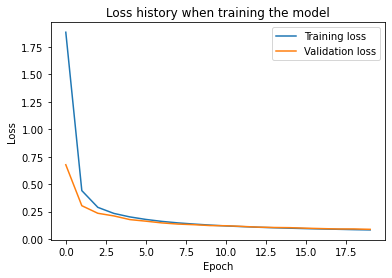

In [18]:
plt.plot(hist_sgd.history['loss'])
plt.plot(hist_sgd.history['val_loss'])
plt.title('Loss history when training the model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss']) #Table
plt.show()

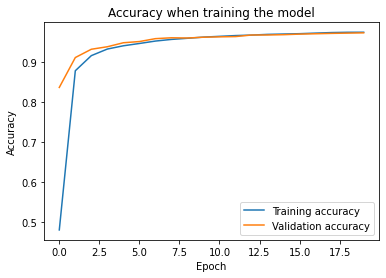

In [19]:
plt.plot(hist_sgd.history['accuracy'])
plt.plot(hist_sgd.history['val_accuracy'])
plt.title('Accuracy when training the model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy']) #Table
plt.show()